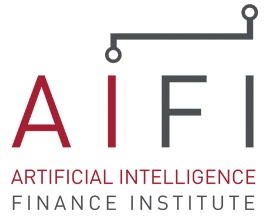


# Bootcamp - Python and Coding - Primer

# Data Analysis with pandas

# About this Notebook

pandas is a fast, powerful, flexible and easy-to-use open source tool for data analysis and manipulation,
which is built on the Python programming language. This notebook provides a brief introduction to the most commonly used operations performed with pandas. pandas comes with a comprehensive [user guide](https://pandas.pydata.org/docs/user_guide/index.html) that contains numerous examples.

## pandas Basics

### First Steps with DataFrame Class

# Imports

In [1]:
# standard imports
import pandas as pd 
import numpy as np

# for downloading stocks
import yfinance as yf

# imports for plotting
import seaborn as sns
from pylab import plt, mpl 

#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# custom styled plotting settings

%matplotlib inline
#sns.set_style('whitegrid', {'axes.facecolor': '.95'})
plt.style.use('../../custom_plot_style.mplstyle') # use the custom style sheet

# use custom styed font and image settings 
mpl.rcParams['font.family'] = 'sans-serif' 
mpl.rcParams['font.sans-serif'] = ['Tahoma']
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.DataFrame([12, 22, 32, 42],  
                  columns=['nums'],  
                  index=['a', 'b', 'c', 'd']) 

# display data frame
df  

,nums
a,12
b,22
c,32
d,42


In [4]:
# get index
df.index  

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
# display colums in data frame
df.columns  

Index(['nums'], dtype='object')

In [6]:
# get entry on index c
df.loc['c']  

nums    32
Name: c, dtype: int64

In [7]:
# get entry on index a and d
df.loc[['a', 'd']]  

,nums
a,12
d,42


In [8]:
df.iloc[1:3]  

,nums
b,22
c,32


In [9]:
# sum numbers up
df['nums'].sum()  

108

In [10]:
# use an anonymus function to square the numbers
df.apply(lambda x: x ** 2)  

,nums
a,144
b,484
c,1024
d,1764


In [11]:
# square entries of dataframe
df ** 2  

,nums
a,144
b,484
c,1024
d,1764


In [12]:
# add a new column to the dataframe
df['floats'] = (1.5, 2.5, 3.5, 4.5)  
df

,nums,floats
a,12,1.5
b,22,2.5
c,32,3.5
d,42,4.5


In [13]:
# display entires of new column 
df['floats']  

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
# add new column "stocks"
df['stocks'] = pd.DataFrame(['AAPL', 'AMNZ', 'NVIDA', 'TSLA'],
                           index=['d', 'a', 'b', 'c'])  
df

,nums,floats,stocks
a,12,1.5,AMNZ
b,22,2.5,NVIDA
c,32,3.5,TSLA
d,42,4.5,AAPL


In [15]:
df.append({'nums': 52, 'floats': 5.75, 'stocks': 'JPM'},
               ignore_index=True)  

,nums,floats,stocks
0,12,1.50,AMNZ
1,22,2.50,NVIDA
2,32,3.50,TSLA
3,42,4.50,AAPL
4,52,5.75,JPM


In [16]:
df = df.append(pd.DataFrame({'nums': 100, 'floats': 5.75,
                             'stocks': 'UAL'}, index=['y',]))  
df

,nums,floats,stocks
a,12,1.50,AMNZ
b,22,2.50,NVIDA
c,32,3.50,TSLA
d,42,4.50,AAPL
y,100,5.75,UAL


In [17]:
df = df.append(pd.DataFrame({'stocks': 'BAC'}, index=['z',]), sort=False)  

# show first five rows, can be altered as follows: df.head(num_rows_to_show)
df.head()

,nums,floats,stocks
a,12.0,1.50,AMNZ
b,22.0,2.50,NVIDA
c,32.0,3.50,TSLA
d,42.0,4.50,AAPL
y,100.0,5.75,UAL


In [18]:
# general data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to z
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nums    5 non-null      float64
 1   floats  5 non-null      float64
 2   stocks  6 non-null      object 
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [19]:
# show datatypes
df.dtypes  

nums      float64
floats    float64
stocks     object
dtype: object

In [20]:
# get mean
df[['nums', 'floats']].mean()  

nums      41.60
floats     3.55
dtype: float64

In [21]:
# get standard 
df[['nums', 'floats']].std()  

nums      34.507970
floats     1.662077
dtype: float64

### Further Steps with DataFrame Class

In [22]:
np.random.seed(42)

In [23]:
# assign random numbers
a = np.random.standard_normal((9, 4))
a

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358,  0.37569802],
       [-0.60063869, -0.29169375, -0.60170661,  1.85227818],
       [-0.01349722, -1.05771093,  0.82254491, -1.22084365]])

In [24]:
# create dataframe
df = pd.DataFrame(a)
df.head()

,0,1,2,3
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304


In [25]:
df.columns = ['No1', 'No2', 'No3', 'No4']  

In [26]:
df

,No1,No2,No3,No4
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844


In [27]:
df['No2'].mean()  

-0.3214591684580857

In [28]:
dates = pd.date_range('2019-1-1', periods=9, freq='M')  

In [29]:
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [30]:
df.index = dates

In [31]:
df

,No1,No2,No3,No4
2019-01-31,0.496714,-0.138264,0.647689,1.523030
2019-02-28,-0.234153,-0.234137,1.579213,0.767435
2019-03-31,-0.469474,0.542560,-0.463418,-0.465730
2019-04-30,0.241962,-1.913280,-1.724918,-0.562288
2019-05-31,-1.012831,0.314247,-0.908024,-1.412304
2019-06-30,1.465649,-0.225776,0.067528,-1.424748
2019-07-31,-0.544383,0.110923,-1.150994,0.375698
2019-08-31,-0.600639,-0.291694,-0.601707,1.852278
2019-09-30,-0.013497,-1.057711,0.822545,-1.220844


In [32]:
df.values

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358,  0.37569802],
       [-0.60063869, -0.29169375, -0.60170661,  1.85227818],
       [-0.01349722, -1.05771093,  0.82254491, -1.22084365]])

In [33]:
np.array(df)

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358,  0.37569802],
       [-0.60063869, -0.29169375, -0.60170661,  1.85227818],
       [-0.01349722, -1.05771093,  0.82254491, -1.22084365]])

## Basic Analytics

In [34]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [35]:
df.describe()  

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.074517,-0.321459,-0.192454,-0.063052
std,0.738392,0.747060,1.058457,1.249646
min,-1.012831,-1.913280,-1.724918,-1.424748
25%,-0.544383,-0.291694,-0.908024,-1.220844
50%,-0.234153,-0.225776,-0.463418,-0.465730
75%,0.241962,0.110923,0.647689,0.767435
max,1.465649,0.542560,1.579213,1.852278


In [36]:
df.sum()  

No1   -0.670652
No2   -2.893133
No3   -1.732085
No4   -0.567472
dtype: float64

In [37]:
df.mean()  

No1   -0.074517
No2   -0.321459
No3   -0.192454
No4   -0.063052
dtype: float64

In [38]:
# axis 0” represents rows  
df.mean(axis=0)  

No1   -0.074517
No2   -0.321459
No3   -0.192454
No4   -0.063052
dtype: float64

In [39]:
# “axis 1” represents columns
df.mean(axis=1)  

2019-01-31    0.632292
2019-02-28    0.469589
2019-03-31   -0.214015
2019-04-30   -0.989631
2019-05-31   -0.754728
2019-06-30   -0.029337
2019-07-31   -0.302189
2019-08-31    0.089560
2019-09-30   -0.367377
Freq: M, dtype: float64

In [40]:
np.mean(df)  

No1   -0.074517
No2   -0.321459
No3   -0.192454
No4   -0.063052
dtype: float64

In [41]:
df.cumsum()  

,No1,No2,No3,No4
2019-01-31,0.496714,-0.138264,0.647689,1.523030
2019-02-28,0.262561,-0.372401,2.226901,2.290465
2019-03-31,-0.206914,0.170159,1.763484,1.824735
2019-04-30,0.035049,-1.743121,0.038566,1.262447
2019-05-31,-0.977782,-1.428874,-0.869458,-0.149856
2019-06-30,0.487866,-1.654650,-0.801930,-1.574605
2019-07-31,-0.056516,-1.543728,-1.952924,-1.198907
2019-08-31,-0.657155,-1.835422,-2.554630,0.653372
2019-09-30,-0.670652,-2.893133,-1.732085,-0.567472


In [42]:
# raises warning
np.log(df)  

,No1,No2,No3,No4
2019-01-31,-0.699741,NaN,-0.434345,0.420702
2019-02-28,NaN,NaN,0.456927,-0.264702
2019-03-31,NaN,-0.611457,NaN,NaN
2019-04-30,-1.418973,NaN,NaN,NaN
2019-05-31,NaN,-1.157575,NaN,NaN
2019-06-30,0.382298,NaN,-2.695210,NaN
2019-07-31,NaN,-2.198923,NaN,-0.978970
2019-08-31,NaN,NaN,NaN,0.616416
2019-09-30,NaN,NaN,-0.195352,NaN


In [43]:
np.sqrt(abs(df))  

,No1,No2,No3,No4
2019-01-31,0.704780,0.371839,0.804791,1.234111
2019-02-28,0.483894,0.483877,1.256667,0.876034
2019-03-31,0.685182,0.736587,0.680748,0.682444
2019-04-30,0.491897,1.383214,1.313361,0.749858
2019-05-31,1.006395,0.560578,0.952903,1.188404
2019-06-30,1.210640,0.475159,0.259862,1.193628
2019-07-31,0.737823,0.333050,1.072844,0.612942
2019-08-31,0.775009,0.540087,0.775698,1.360984
2019-09-30,0.116178,1.028451,0.906943,1.104918


In [44]:
np.sqrt(abs(df)).sum()  

No1    6.211796
No2    5.912841
No3    8.023816
No4    9.003323
dtype: float64

In [45]:
100 * df + 100  

,No1,No2,No3,No4
2019-01-31,149.671415,86.173570,164.768854,252.302986
2019-02-28,76.584663,76.586304,257.921282,176.743473
2019-03-31,53.052561,154.256004,53.658231,53.427025
2019-04-30,124.196227,-91.328024,-72.491783,43.771247
2019-05-31,-1.283112,131.424733,9.197592,-41.230370
2019-06-30,246.564877,77.422370,106.752820,-42.474819
2019-07-31,45.561728,111.092259,-15.099358,137.569802
2019-08-31,39.936131,70.830625,39.829339,285.227818
2019-09-30,98.650278,-5.771093,182.254491,-22.084365


## Basic Visualization

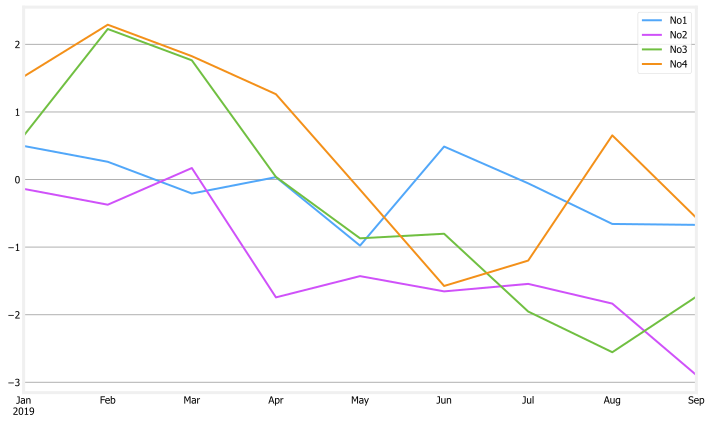

In [46]:
df.cumsum().plot(lw=2.0, figsize=(10, 6));  

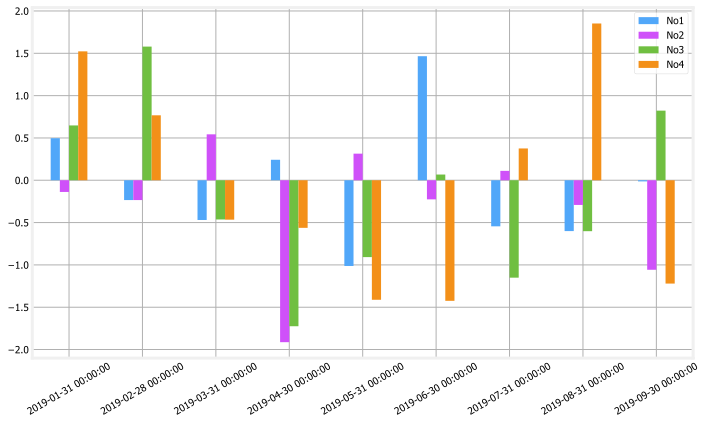

In [47]:
df.plot.bar(figsize=(10, 6), rot=30);  

## Series Class

In [48]:
type(df)

pandas.core.frame.DataFrame

In [49]:
S = pd.Series(np.linspace(0, 15, 7), name='series')

In [50]:
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [51]:
type(S)

pandas.core.series.Series

In [52]:
s = df['No1']

In [53]:
s

2019-01-31    0.496714
2019-02-28   -0.234153
2019-03-31   -0.469474
2019-04-30    0.241962
2019-05-31   -1.012831
2019-06-30    1.465649
2019-07-31   -0.544383
2019-08-31   -0.600639
2019-09-30   -0.013497
Freq: M, Name: No1, dtype: float64

In [54]:
type(s)

pandas.core.series.Series

In [55]:
s.mean()

-0.0745169251862014

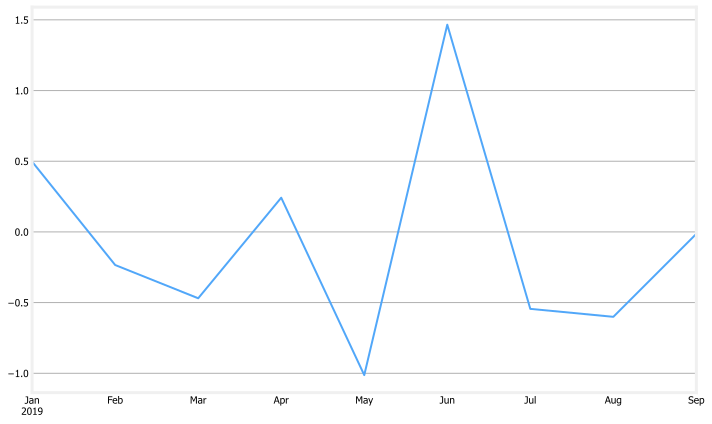

In [56]:
s.plot(lw=2.0, figsize=(10, 6));

## GroupBy Operations

In [57]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2',
                 'Q2', 'Q3', 'Q3', 'Q3']
df.head(3)

,No1,No2,No3,No4,Quarter
2019-01-31,0.496714,-0.138264,0.647689,1.523030,Q1
2019-02-28,-0.234153,-0.234137,1.579213,0.767435,Q1
2019-03-31,-0.469474,0.542560,-0.463418,-0.465730,Q1


In [58]:
groups = df.groupby('Quarter')  

In [59]:
groups.size()  

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [60]:
groups.mean()  

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.068971,0.056720,0.587828,0.608245
Q2,0.231593,-0.608270,-0.855138,-1.133113
Q3,-0.386173,-0.412827,-0.310052,0.335711


In [61]:
groups.max()  

,No1,No2,No3,No4
Quarter,,,,
Q1,0.496714,0.542560,1.579213,1.523030
Q2,1.465649,0.314247,0.067528,-0.562288
Q3,-0.013497,0.110923,0.822545,1.852278


In [62]:
groups.aggregate([min, max]).round(2)  

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -0.47  0.50 -0.23  0.54 -0.46  1.58 -0.47  1.52
Q2      -1.01  1.47 -1.91  0.31 -1.72  0.07 -1.42 -0.56
Q3      -0.60 -0.01 -1.06  0.11 -1.15  0.82 -1.22  1.85

In [63]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [64]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [65]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [66]:
groups[['No1', 'No4']].aggregate([sum, np.mean])

No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even     -0.234153 -0.234153  0.767435  0.767435
        Odd       0.027240  0.013620  1.057300  0.528650
Q2      Even      1.707611  0.853806 -1.987036 -0.993518
        Odd      -1.012831 -1.012831 -1.412304 -1.412304
Q3      Even     -0.600639 -0.600639  1.852278  1.852278
        Odd      -0.557880 -0.278940 -0.845146 -0.422573

## Complex Selection

In [67]:
data = np.random.standard_normal((10, 2))  

In [68]:
df = pd.DataFrame(data, columns=['x', 'y'])  

In [69]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [70]:
df.head()  

,x,y
0,0.208864,-1.959670
1,-1.328186,0.196861
2,0.738467,0.171368
3,-0.115648,-0.301104
4,-1.478522,-0.719844


In [71]:
df.tail()  

,x,y
5,-0.460639,1.057122
6,0.343618,-1.763040
7,0.324084,-0.385082
8,-0.676922,0.611676
9,1.031000,0.931280


In [72]:
df['x'] > 0.5  

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: x, dtype: bool

In [73]:
(df['x'] > 0) & (df['y'] < 0)  

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9    False
dtype: bool

In [74]:
(df['x'] > 0) | (df['y'] < 0)  

0     True
1    False
2     True
3     True
4     True
5    False
6     True
7     True
8    False
9     True
dtype: bool

In [75]:
df[df['x'] > 0]  

,x,y
0,0.208864,-1.959670
2,0.738467,0.171368
6,0.343618,-1.763040
7,0.324084,-0.385082
9,1.031000,0.931280


In [76]:
df.query('x > 0')  

,x,y
0,0.208864,-1.959670
2,0.738467,0.171368
6,0.343618,-1.763040
7,0.324084,-0.385082
9,1.031000,0.931280


In [77]:
df[(df['x'] > 0) & (df['y'] < 0)]  

,x,y
0,0.208864,-1.959670
6,0.343618,-1.763040
7,0.324084,-0.385082


In [78]:
df.query('x > 0 & y < 0')  

,x,y
0,0.208864,-1.959670
6,0.343618,-1.763040
7,0.324084,-0.385082


In [79]:
df[(df.x > 0) | (df.y < 0)]  

,x,y
0,0.208864,-1.959670
2,0.738467,0.171368
3,-0.115648,-0.301104
4,-1.478522,-0.719844
6,0.343618,-1.763040
7,0.324084,-0.385082
9,1.031000,0.931280


In [80]:
df > 0  

,x,y
0,True,False
1,False,True
2,True,True
3,False,False
4,False,False
5,False,True
6,True,False
7,True,False
8,False,True
9,True,True


In [81]:
df[df > 0]  

,x,y
0,0.208864,NaN
1,NaN,0.196861
2,0.738467,0.171368
3,NaN,NaN
4,NaN,NaN
5,NaN,1.057122
6,0.343618,NaN
7,0.324084,NaN
8,NaN,0.611676
9,1.031000,0.931280


## Concatenation, Joining and Merging

In [82]:
df1 = pd.DataFrame(['100', '200', '300', '400'], 
                    index=['a', 'b', 'c', 'd'],
                    columns=['A',])

In [83]:
df1

,A
a,100
b,200
c,300
d,400


In [84]:
df2 = pd.DataFrame(['200', '150', '50'], 
                    index=['f', 'b', 'd'],
                    columns=['B',])

In [85]:
df2

,B
f,200
b,150
d,50


#### Concatenation

In [86]:
df1.append(df2, sort=False)  

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [87]:
df1.append(df2, ignore_index=True, sort=False)  

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [88]:
# takes a list or dict of homogeneously-typed objects and concatenates them with some configurable handling of “what to do with the other axes”:

pd.concat((df1, df2), sort=False)  

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [89]:
pd.concat((df1, df2), ignore_index=True, sort=False)  

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


#### Joining

In [90]:
# pandas has full-featured, high performance in-memory join operations idiomatically 
# very similar to relational databases like SQL.
df1.join(df2)  

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [91]:
df2.join(df1)  

,B,A
f,200,NaN
b,150,200
d,50,400


In [92]:
df1.join(df2, how='left')  

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [93]:
df1.join(df2, how='right')  

,A,B
f,NaN,200
b,200,150
d,400,50


In [94]:
df1.join(df2, how='inner')  

,A,B
b,200,150
d,400,50


In [95]:
df1.join(df2, how='outer')  

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


In [96]:
df = pd.DataFrame()

In [97]:
df['A'] = df1['A']  

In [98]:
df

,A
a,100
b,200
c,300
d,400


In [99]:
df['B'] = df2  

In [100]:
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [101]:
df = pd.DataFrame({'A': df1['A'], 'B': df2['B']})  

In [102]:
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


#### Merging

In [103]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

In [104]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [105]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [106]:
# difference merge/ join:
# join() is used to combine two DataFrames on the index but not on columns 
# whereas merge() is primarily used to specify the columns you wanted to join on

pd.merge(df1, df2)  

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [107]:
pd.merge(df1, df2, on='C')  

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [108]:
pd.merge(df1, df2, how='outer')  

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [109]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [110]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')  

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [111]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [112]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [113]:
pd.merge(df1, df2, on='C', how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [114]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


### Dynamic Variable Creation


The `globals()` function in Python is a built-in function that returns a dictionary of the current global symbol table. This function can be useful for creating variables dynamically because it allows you to dynamically add new variables to the global symbol table at runtime. This can be helpful in cases where you need to dynamically create a large number of variables with different names, or when you need to dynamically set the values of variables based on some programmatic logic.

By using the `globals()` function, you can add new variables to the global symbol table without having to specify their names beforehand. This can make your code more flexible and adaptable, as you can change the names of variables or the values they hold without having to modify the code that creates them.

In addition, creating variables dynamically can be useful in finance and economics when you need to process large amounts of financial data. For example, you might use the globals() function to dynamically create variables for each stock in a portfolio, where the names of the variables are based on the stock symbols. This can allow you to easily access and manipulate the data for each stock in your portfolio, without having to hard-code the names of the variables.

Overall, the `globals()` function provides a powerful tool for creating variables dynamically in Python, and can be a valuable resource for anyone who needs to process and analyze large amounts of data.

In [115]:
# List of ticker symbols for Apple, Microsoft, and Google
tickers = ['AAPL', 'MSFT', 'GOOG']

# Download the stock data for the tickers using yfinance
df = yf.download(tickers, start="2010-01-01", end="2020-12-31")

# Save the data for each stock in a separate dataframe
df_AAPL = df['Adj Close']['AAPL']
df_MSFT = df['Adj Close']['MSFT']
df_GOOG = df['Adj Close']['GOOG']

# Create a dictionary to store the dataframes
df_dict = {'AAPL': df_AAPL, 'MSFT': df_MSFT, 'GOOG': df_GOOG}

# Iterate through the dictionary to create variables dynamically using globals()
for ticker, data in df_dict.items():
    globals()[f'df_{ticker}'] = data

# Use the created variables to access the stock data
print(df_AAPL.head())
print(df_MSFT.head())
print(df_GOOG.head())

[*********************100%***********************]  3 of 3 completed
Date
2009-12-31    6.405578
2010-01-04    6.505280
2010-01-05    6.516527
2010-01-06    6.412873
2010-01-07    6.401019
Name: AAPL, dtype: float64
Date
2009-12-31    23.323427
2010-01-04    23.683065
2010-01-05    23.690720
2010-01-06    23.545336
2010-01-07    23.300472
Name: MSFT, dtype: float64
Date
2009-12-31    15.441621
2010-01-04    15.610239
2010-01-05    15.541497
2010-01-06    15.149715
2010-01-07    14.797037
Name: GOOG, dtype: float64
